In [4]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import metrics

## Download Data

In [5]:
data=pd.read_csv('/Users/mac/Downloads/insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Linear Regression

In [7]:
#select the features you are interested in
X = np.c_[data["age"]]
y = np.c_[data["charges"]]
np.shape(X)

(68, 1)

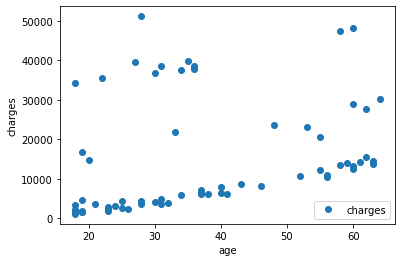

In [8]:
# Visualize the sample data
data.plot(x='age', y='charges', style='o')   
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()
#

In [9]:
lrModel = sklearn.linear_model.LinearRegression()
X, X_test, y, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
#R2 est proche de 0 ce qui signifie que la relation entre 'age' et 'charges' est faible
print(lrModel.score(X, y))

0.11833283373106884


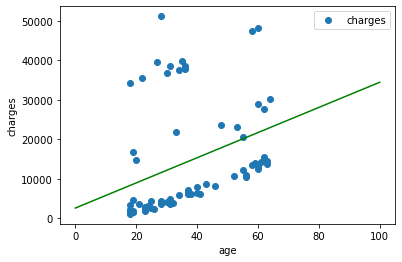

In [10]:
#plot
data.plot(x='age', y='charges', style='o')   
plt.xlabel('age')  
plt.ylabel('charges')
x=np.linspace(0, 100,10)
plt.plot(x, w0 + w1*x, "g")
plt.show()


## Prediction

In [11]:
# Make a prediction for Cyprus
y_pred=lrModel.predict(X_test)
df = pd.DataFrame({'Valeurs réelles': y_test.flatten(), 'Valeurs prédites': y_pred.flatten()})
df

,Valeurs réelles,Valeurs prédites
0,8240.58960,17268.795032
1,36837.46700,12171.681539
2,6313.75900,14401.668692
3,3866.85520,12808.820726
4,14451.83515,22684.478118
5,11090.71780,20454.490965
6,2198.18985,8348.846419
7,34303.16720,8348.846419
8,23568.27200,17905.934218
9,47496.49445,21091.630151


## Add polynomial features

In [12]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
scaler = preprocessing.StandardScaler()
pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

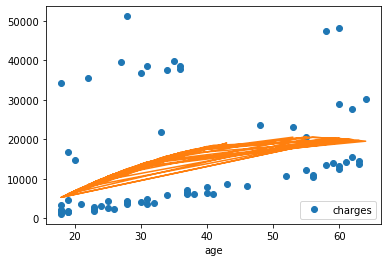

In [13]:
data.plot(x='age', y='charges', style='o')   
curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.show()

In [14]:
print(pipelineLRModel.score(X, y))

0.14019770931762598


## Regularization (Ridge)

In [15]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["age"]]
ysample = np.c_[data["charges"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

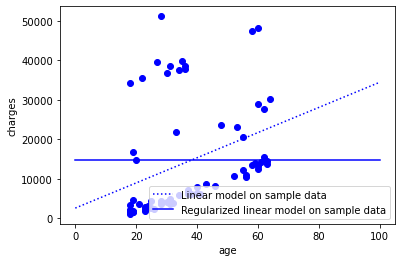

In [16]:
plt.xlabel("age")
plt.ylabel('charges')

plt.plot(list(data["age"]), list(data["charges"]), "bo")
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")

plt.show()

In [17]:
#R2
print(lrModelRidge.score(X, y))

-0.0011808496747414132


## Regularization Lasso

In [18]:
lrModelLasso = sklearn.linear_model.Lasso(alpha=0.1) # alpha == lambda notation in the course
Xsample = np.c_[data["age"]]
ysample = np.c_[data["charges"]]
lrModelLasso.fit(Xsample, ysample)
w0Lasso, w1Lasso = lrModelLasso.intercept_, lrModelLasso.coef_

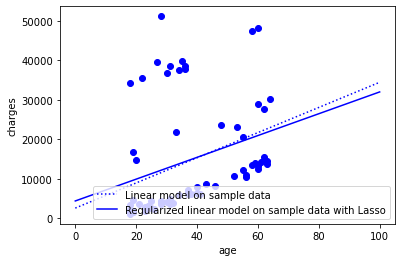

In [19]:
plt.xlabel("age")
plt.ylabel('charges')

plt.plot(list(data["age"]), list(data["charges"]), "bo")
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0Lasso + w1Lasso * x, "b", label="Regularized linear model on sample data with Lasso")

plt.legend(loc="lower right")

plt.show()

plt.show()

In [20]:
#R2
print(lrModelLasso.score(X, y))

0.11588338311439617


## Multiple Linear Regression

In [21]:
#Une faible relation entre age et charges, donc on doit ajouter d'autres features 
#select the features you are interested in
X = np.c_[data[['age','bmi']]]
y = np.c_[data["charges"]]
np.shape(X)

(68, 2)

In [22]:
lrModel = sklearn.linear_model.LinearRegression()
X, X_test, y, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
# Train the model
lrModel.fit(X, y)

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
#R2 est proche de 0 ce qui signifie que la relation entre 'age' et 'charges' est faible
print(lrModel.score(X, y))

0.16026446424213214


In [23]:
y_pred = lrModel.predict(X_test)

In [24]:
df = pd.DataFrame({'Valeurs réelles': [y_test], 'Valeurs prédites': [y_pred]})
df.head()

,Valeurs réelles,Valeurs prédites
0,"[[2395.17155], [11090.7178], [39774.2763], [14...","[[5103.25033190586], [25147.56382804857], [173..."


## Tune the regularization hyper-parameter alpha

In [25]:
# define model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
model = sklearn.linear_model.Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -10722.631
Config: {'alpha': 0.99}
